In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
data = pd.read_csv("Heart Disease data.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: 'Heart Disease data.csv'

In [3]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
target = data.groupby('target').size()
target

target
0    499
1    526
dtype: int64

In [9]:
def heart_disease(row):
    if row == 0:
        return("Absence")
    elif row == 1:
        return("Presence")

In [12]:
data['Heart_Disease'] = data['target'].apply(heart_disease)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence


In [13]:
count_ap = data.groupby('Heart_Disease')['target'].count()
count_ap

Heart_Disease
Absence     499
Presence    526
Name: target, dtype: int64

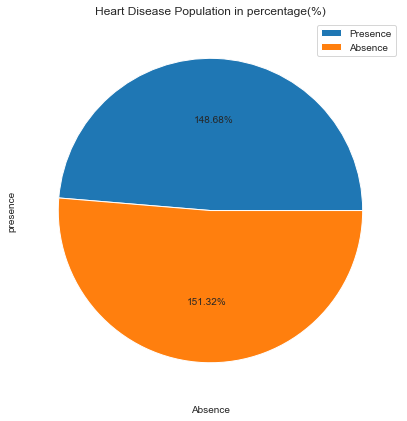

In [14]:
plt.figure(figsize = (10, 7))
plt.pie(count_ap, autopct="1%.2f%%")
plt.ylabel("presence")
plt.xlabel("Absence")
plt.title("Heart Disease Population in percentage(%)")
plt.legend(["Presence", "Absence"])
plt.show()

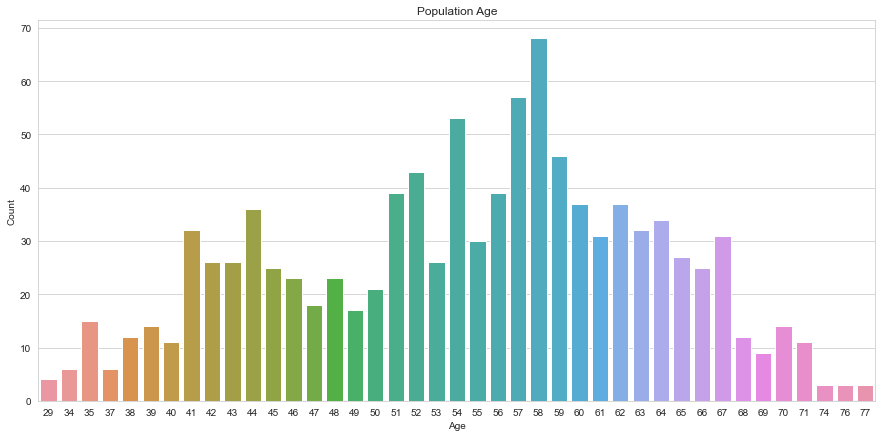

In [18]:
plt.figure(figsize=(15, 7))
sns.countplot(x = "age", data= data)
plt.title("Population Age")
plt.ylabel("Count")
plt.xlabel('Age')
plt.show()

In [19]:
Max_age = data['age'].max()
Min_age = data['age'].min()
Mean_age = data['age'].mean()
print("Maximum Age affected by Heart Disease: ",Max_age)
print("Minimum Age affected by Heart Disease: ",Min_age)
print("Mean of age: ", Mean_age)

Maximum Age affected by Heart Disease:  77
Minimum Age affected by Heart Disease:  29
Mean of age:  54.43414634146342


In [24]:
young_age = data[(data['age']>=29) & (data['age']<40)]
middle_age = data[(data['age']>=40) & (data['age']<55)]
elder_age = data[data['age']>55]
print("Heart Disease affected by Young age: ",len(young_age))
print("Heart Disease affected by Middle age: ",len(middle_age))
print("Heart Disease affected by Elder age: ",len(elder_age))

Heart Disease affected by Young age:  57
Heart Disease affected by Middle age:  419
Heart Disease affected by Elder age:  519


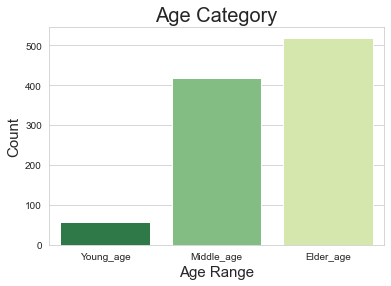

In [32]:
sns.barplot(x = ['Young_age', 'Middle_age', 'Elder_age'], y=[len(young_age), len(middle_age), len(elder_age)], palette='YlGn_r')
plt.title("Age Category", fontsize=20)
plt.xlabel("Age Range", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [33]:
def gender(row):
    if row == 1:
        return 'Male'
    elif row == 0:
        return 'Female'

In [34]:
data['gender'] = data['sex'].apply(gender)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Presence,Male
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Absence,Male
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Absence,Male
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Presence,Female


In [35]:
def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [44]:
data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,gender,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder Age


C:\Users\Admin\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


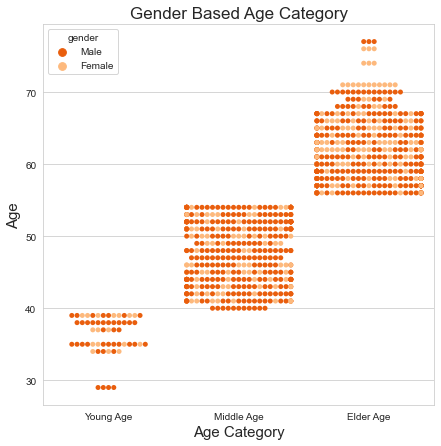

In [45]:
plt.figure(figsize=(7,7))
sns.swarmplot(x='Age_Range', y='age', hue='gender', data=data, order=['Young Age','Middle Age','Elder Age'], palette='Oranges_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

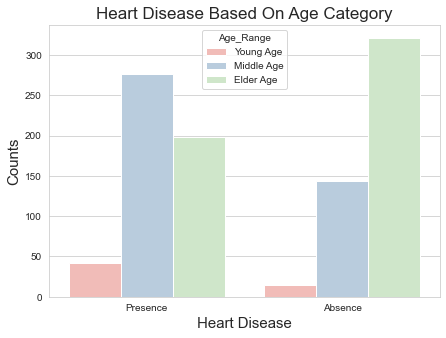

In [46]:
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Presence','Absence'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

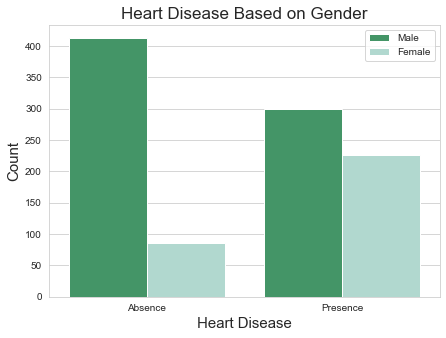

In [48]:
plt.figure(figsize=(7,5))
sns.countplot(x=data['Heart_Disease'], hue='gender', data=data, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

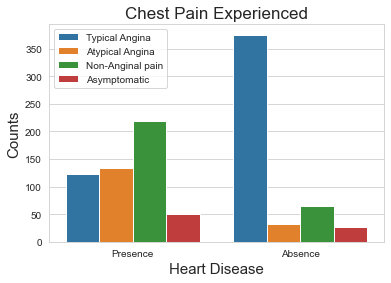

In [49]:
sns.countplot(x=data['Heart_Disease'], hue='cp', data=data, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

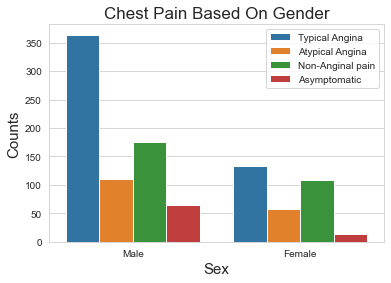

In [50]:
sns.countplot(x=data['gender'], hue='cp', data=data)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

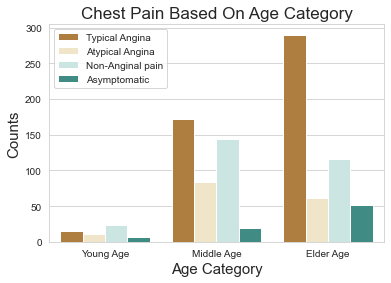

In [51]:
sns.countplot(x=data['Age_Range'], hue='cp', data=data, order=['Young Age', 'Middle Age', 'Elder Age'], palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

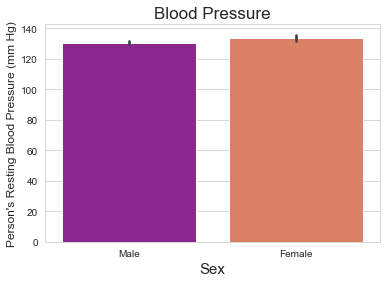

In [52]:
sns.barplot(x='gender', y='trestbps', data=data, palette='plasma')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

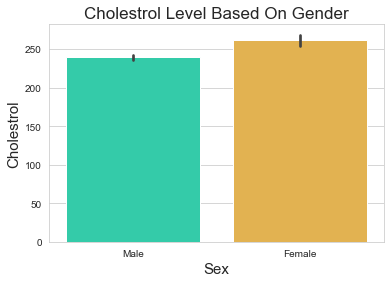

In [53]:
sns.barplot(x='gender', y='chol', data=data, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

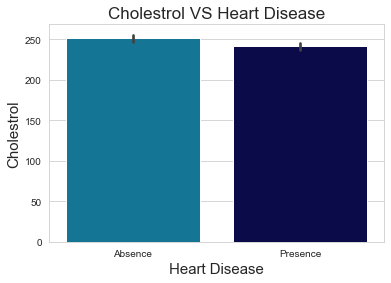

In [54]:
sns.barplot(x='Heart_Disease', y='chol', data=data, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

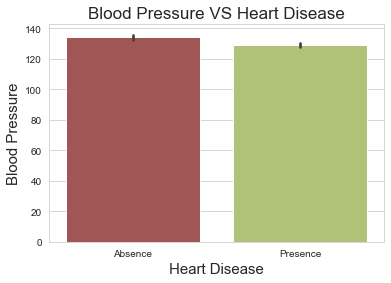

In [55]:
sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

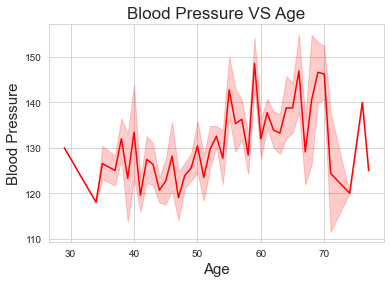

In [58]:
sns.lineplot(x='age', y='trestbps', data=data, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

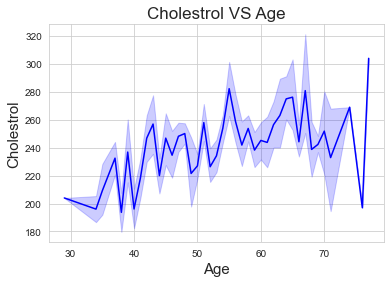

In [59]:
sns.lineplot(x='age', y='chol', data=data, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

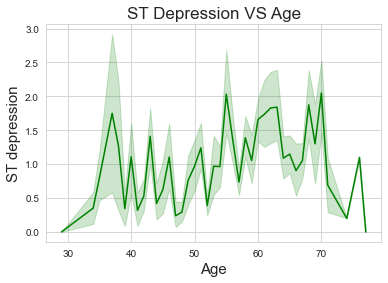

In [60]:
sns.lineplot(x='age', y='oldpeak', data=data, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

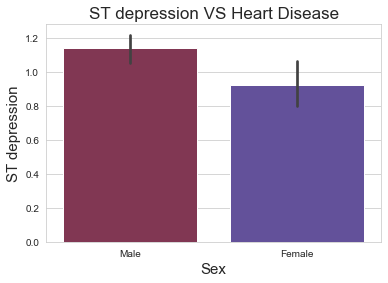

In [62]:
sns.barplot(x='gender', y='oldpeak', data=data, palette='twilight_r')
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

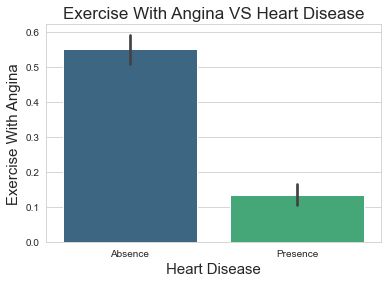

In [63]:
sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

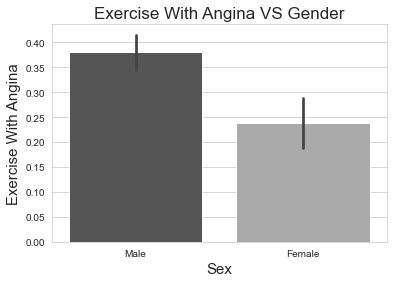

In [64]:
sns.barplot(x='gender', y='exang', data=data, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

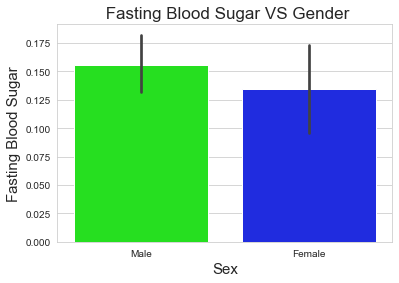

In [65]:
sns.barplot(y='fbs', x='gender', data=data, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

<AxesSubplot:>

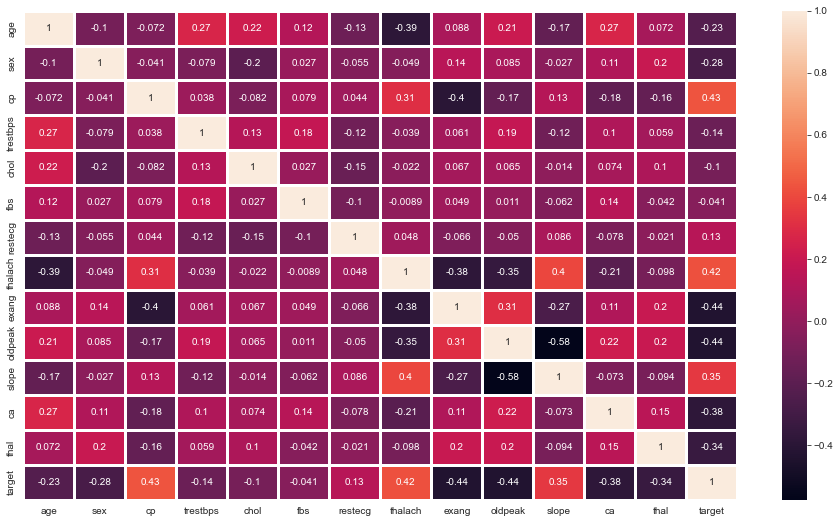

In [66]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidth=3)